### #1 Data exploration

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Importing all dedicated libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
import warnings
warnings.filterwarnings('ignore')
#from scipy.stats import shapiro
import scipy.stats as st
from scipy import stats
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
#import math
#from sklearn.preprocessing import PowerTransformer
#import pickle

In [3]:
# Print whole df if necessary

pd.set_option('display.max_rows', 100)

In [4]:
# Reading files into a DF

df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [5]:
# Checking the df

df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
df.shape

(9134, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [8]:
# Renaming columns
#df.rename(columns=lambda x: x.replace(' ', '_').lower())

df.columns= df.columns.str.lower().str.replace(' ','_')

In [9]:
df['effective_to_date'].dtype

dtype('O')

In [10]:
# Fixing datetime col

df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])

In [11]:
df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [12]:
# Checking nan values

df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [13]:
# Checking duplicated rows

df.duplicated().sum()

0

In [14]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [15]:
# organizing df ... target variable to the last

df= df[['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'total_claim_amount']]

In [16]:
for x in df.columns:
    print( x, '|', 'uniques:', len(df[x].unique()), '|', 'type:', df[x].dtypes)

customer | uniques: 9134 | type: object
state | uniques: 5 | type: object
customer_lifetime_value | uniques: 8041 | type: float64
response | uniques: 2 | type: object
coverage | uniques: 3 | type: object
education | uniques: 5 | type: object
effective_to_date | uniques: 59 | type: datetime64[ns]
employmentstatus | uniques: 5 | type: object
gender | uniques: 2 | type: object
income | uniques: 5694 | type: int64
location_code | uniques: 3 | type: object
marital_status | uniques: 3 | type: object
monthly_premium_auto | uniques: 202 | type: int64
months_since_last_claim | uniques: 36 | type: int64
months_since_policy_inception | uniques: 100 | type: int64
number_of_open_complaints | uniques: 6 | type: int64
number_of_policies | uniques: 9 | type: int64
policy_type | uniques: 3 | type: object
policy | uniques: 9 | type: object
renew_offer_type | uniques: 4 | type: object
sales_channel | uniques: 4 | type: object
vehicle_class | uniques: 6 | type: object
vehicle_size | uniques: 3 | type: obj

In [17]:
numerical_cols = df.select_dtypes(np.number).columns
categorical_cols = df.select_dtypes(np.object).columns
discrete_cols= []
num_cols = []

In [18]:
# Function to return cat/num/dis variables

def num_dis_cat(data, tipo= ['cat', 'dis', 'num']):
        
    if tipo == 'dis':
        for x in numerical_cols:
            if len(data[x].unique()) < 10:
                discrete_cols.append(x)
        return data[discrete_cols]
    
    elif tipo == 'num':
        for x in numerical_cols:
            if len(data[x].unique()) > 10:
                num_cols.append(x)
        return data[num_cols]
        
    else: return data[categorical_cols]

In [19]:
discretes= num_dis_cat(df, 'dis')
numericals= num_dis_cat(df, 'num')
categoricals= num_dis_cat(df, 'cat')

In [20]:
discretes.head()
discretes.shape
discretes['number_of_open_complaints'].value_counts()
discretes['number_of_policies'].value_counts()

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


(9134, 2)

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64

In [21]:
# How can i distribute this variables ??? 

In [22]:
numericals.head()
numericals.shape

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


(9134, 6)

In [23]:
categoricals.head()
categoricals.shape

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


(9134, 15)

### Data engineering every single categorical variable. 

In [24]:
categoricals['customer'].unique()

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

In [25]:
categoricals['state'].value_counts()/len(categoricals['state'])

California    0.344865
Oregon        0.284760
Arizona       0.186446
Nevada        0.096562
Washington    0.087366
Name: state, dtype: float64

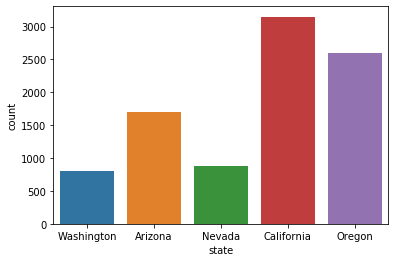

In [26]:
sns.countplot(data= categoricals, x= 'state')

In [27]:
categoricals['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [28]:
# grouping non relevant states

rel_states= ['California', 'Oregon']

def grouping_states(x):
    
    if not x in rel_states:
        x= 'Other'
        return x
    else: return x
    
categoricals['state']= categoricals['state'].apply(grouping_states)

In [29]:
categoricals['state']= categoricals['state'].replace('California state', 'California')

In [30]:
categoricals['state'].value_counts()

Other         3383
California    3150
Oregon        2601
Name: state, dtype: int64

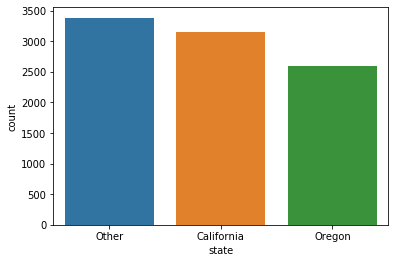

In [31]:
sns.countplot(data= categoricals, x= 'state')

In [32]:
categoricals['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [33]:
categoricals['coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

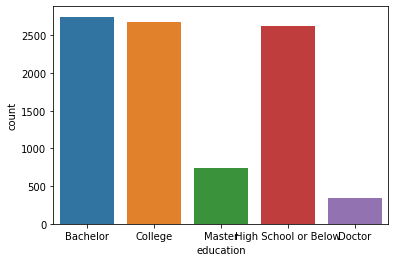

In [34]:
sns.countplot(data= categoricals, x= 'education')

In [35]:
categoricals['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [36]:
# grouping non relevant states

higher_ed= ['Master', 'Doctor']

def grouping_education(x):
    
    if x in higher_ed:
        x= 'Higher Education'
        return x
    else: return x
    
categoricals['education']= categoricals['education'].apply(grouping_education)

In [37]:
categoricals['employmentstatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [38]:
categoricals['gender'].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [39]:
categoricals['location_code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [40]:
categoricals['marital_status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [41]:
categoricals['policy_type'].value_counts()/len(categoricals['policy_type'])

Personal Auto     0.743157
Corporate Auto    0.215459
Special Auto      0.041384
Name: policy_type, dtype: float64

In [42]:
# we can assume this 2 columns are pretty much the same

categoricals['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [43]:
# cleaning policy

def cleaning_pol(x):
    
    if 'Personal' in x:
        x= 'Personal'
        return x
    else: 
        x= 'Other'
        return x
    
categoricals['policy']= categoricals['policy'].apply(cleaning_pol)

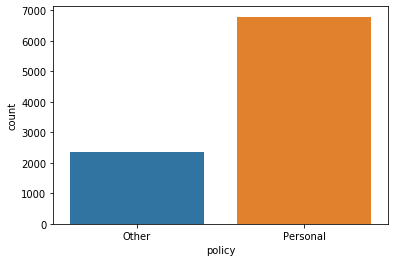

In [44]:
sns.countplot(x= 'policy', data= categoricals)

In [45]:
# deleting one of the 2 columns

categoricals.drop(columns= 'policy_type', inplace= True)

In [46]:
categoricals['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [47]:
# cleaning offers

def cleaning_offer(x):
    
    if '1' in x:
        x= re.sub('Offer', '',x)
        return x

    elif '2' in x:
        x= re.sub('Offer', '',x)
        return x
        
    else: 
        x= re.sub('Offer3|Offer4', '3',x)
        return x
    
categoricals['renew_offer_type']= categoricals['renew_offer_type'].apply(cleaning_offer)

In [48]:
categoricals['sales_channel']= categoricals['sales_channel'].replace(['Web', 'Call Center'], 'Other')

In [49]:
categoricals['sales_channel'].value_counts()

Agent     3477
Other     3090
Branch    2567
Name: sales_channel, dtype: int64

In [50]:
def cleaning_vecl(x):
    
    if ('SUV' or 'Sport') in x:
        x= 'SUV'
        return x
        
    else: 
        x= 'Standard'
        return x

categoricals['vehicle_class']= categoricals['vehicle_class'].apply(cleaning_vecl)

In [51]:
categoricals['vehicle_class'].value_counts()

Standard    7154
SUV         1980
Name: vehicle_class, dtype: int64

In [52]:
categoricals['vehicle_size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [53]:
categoricals.shape
categoricals.columns

(9134, 14)

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size'],
      dtype='object')

In [54]:
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Other,No,Basic,Bachelor,Employed,F,Suburban,Married,Other,1,Agent,Standard,Medsize
1,QZ44356,Other,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,3,Agent,Standard,Medsize
2,AI49188,Other,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,1,Agent,Standard,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Other,1,Other,SUV,Medsize
4,HB64268,Other,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,1,Agent,Standard,Medsize


In [55]:
# checking dependecy btween variables next to each other

for x in range(len(categoricals.columns)-1):
    cross = pd.crosstab(categoricals[categoricals.columns[x]], categoricals[categoricals.columns[x+1]], margins = False)
    P = st.chi2_contingency(cross)
    print('P value of ',categoricals.columns[x], 'and', categoricals.columns[x+1] , P[1])

P value of  customer and state 0.4944343563922849
P value of  state and response 0.8721130635472298
P value of  response and coverage 0.969826323902391
P value of  coverage and education 0.03572775633568488
P value of  education and employmentstatus 1.3349034793959516e-24
P value of  employmentstatus and gender 0.00018151136449675047
P value of  gender and location_code 1.130242633932661e-15
P value of  location_code and marital_status 2.787741035216401e-90
P value of  marital_status and policy 0.8919149619428626
P value of  policy and renew_offer_type 0.3864719509336218
P value of  renew_offer_type and sales_channel 2.1596382851600244e-44
P value of  sales_channel and vehicle_class 0.5843287131521193
P value of  vehicle_class and vehicle_size 0.0673653216392462


In [56]:
# checking the correlation btween certain variables

# state location_code (not dependant)
crosstab1 = pd.crosstab(categoricals['state'], categoricals['location_code'], margins = False)
Pval1= st.chi2_contingency(crosstab1)[1]
print('state | location_code', Pval1)
# not dependant

#sales_channel renwe_offer_type (very dependant)
crosstab2 = pd.crosstab(categoricals['sales_channel'], categoricals['renew_offer_type'], margins = False)
Pval2= st.chi2_contingency(crosstab2)[1]
print('sales_channel | renew_offer_type', Pval2)
# dependant

#sales_channel renwe_offer_type (very dependant)
crosstab3 = pd.crosstab(categoricals['vehicle_class'], categoricals['vehicle_size'], margins = False)
Pval3= st.chi2_contingency(crosstab3)[1]
print('vehicle_class | vehicle_size', Pval3)
# slightly dependant


#marital_status employment_status (very dependant)
crosstab4 = pd.crosstab(categoricals['employmentstatus'], categoricals['marital_status'], margins = False)
Pval4= st.chi2_contingency(crosstab4)[1]
print('employmentstatus | marital_status', Pval4)
# slightly dependant


#renewoffer maritalstatus (very dependant)
crosstab4 = pd.crosstab(categoricals['employmentstatus'], categoricals['marital_status'], margins = False)
Pval4= st.chi2_contingency(crosstab4)[1]
print('employmentstatus | marital_status', Pval4)
# slightly dependant

state | location_code 0.9906201131730039
sales_channel | renew_offer_type 2.1596382851599936e-44
vehicle_class | vehicle_size 0.0673653216392462
employmentstatus | marital_status 0.0
employmentstatus | marital_status 0.0


### From previous analysis, this is the dataset (categoricals only) that will be used from now on

In [57]:
categoricals_red= categoricals[['gender', 'coverage', 'employmentstatus', 'location_code', 'policy', 'renew_offer_type', 'vehicle_size']]

In [58]:
categoricals_red.head()

,gender,coverage,employmentstatus,location_code,policy,renew_offer_type,vehicle_size
0,F,Basic,Employed,Suburban,Other,1,Medsize
1,F,Extended,Unemployed,Suburban,Personal,3,Medsize
2,F,Premium,Employed,Suburban,Personal,1,Medsize
3,M,Basic,Unemployed,Suburban,Other,1,Medsize
4,M,Basic,Employed,Rural,Personal,1,Medsize


In [59]:
# Sizes: Small-> S, Medium-> M, Large-> L.

categoricals_red['vehicle_size'].replace({'Medsize':'M', 'Small': 'S', 'Large':'L'}, inplace= True)

In [60]:
# Policies: Personal-> P, Other-> O

categoricals_red['policy'].replace({'Personal':'P', 'Other': 'O'}, inplace= True)

In [61]:
# Policies: Suburban-> S, Rural-> R, Urban-> U

categoricals_red['location_code'].replace({'Suburban':'S', 'Rural': 'R', 'Urban': 'U'}, inplace= True)

In [62]:
categoricals_red['location_code'].unique()

array(['S', 'R', 'U'], dtype=object)

In [63]:
# empstatus: Suburban-> S, Rural-> R, Urban-> U

#categoricals_red['location_code'].replace({'Suburban':'S', 'Rural': 'R', 'Urban': 'U'}, inplace= True)

In [64]:
categoricals_red['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [65]:
# grouping status

emp_status= ['Unemployed', 'Medical Leave', 'Disabled', 'Retired']

def grouping_status(x):
    
    if x in emp_status:
        x= 'O'
        return x
    else: return 'E'
    
categoricals_red['employmentstatus']= categoricals_red['employmentstatus'].apply(grouping_status)

In [66]:
grouping_status('Unemployed')

'O'

In [67]:
# Coverage: Basic-> B, Premium / Extended-> E

categoricals_red['coverage'].replace({'Extended':'E', 'Premium': 'E', 'Basic': 'B'}, inplace= True)

In [68]:
categoricals_red['coverage'].unique()

array(['B', 'E'], dtype=object)

AxesSubplot(0.125,0.125;0.775x0.755)


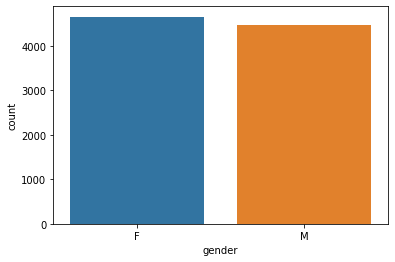

AxesSubplot(0.125,0.125;0.775x0.755)


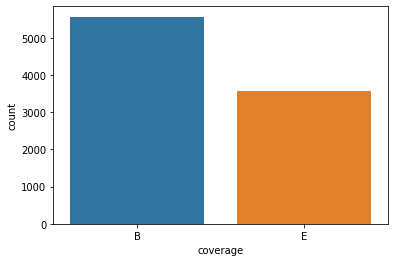

AxesSubplot(0.125,0.125;0.775x0.755)


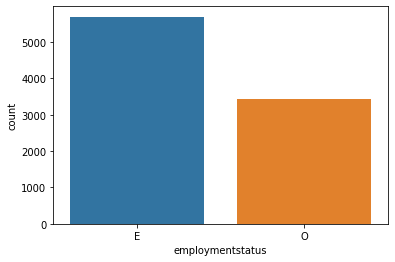

AxesSubplot(0.125,0.125;0.775x0.755)


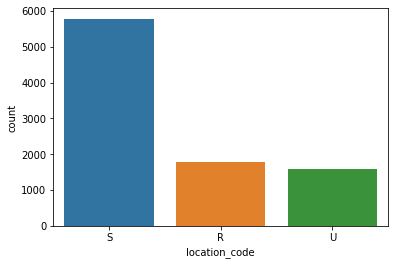

AxesSubplot(0.125,0.125;0.775x0.755)


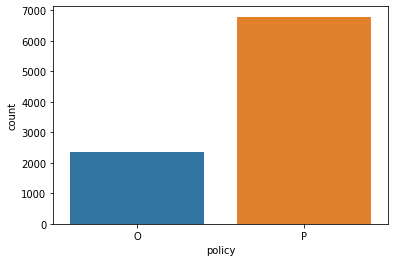

AxesSubplot(0.125,0.125;0.775x0.755)


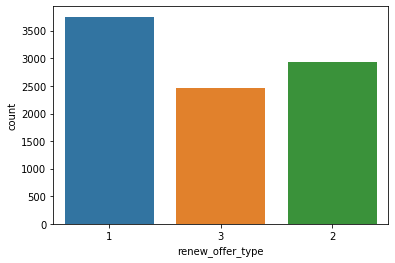

AxesSubplot(0.125,0.125;0.775x0.755)


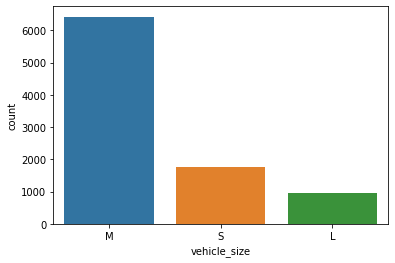

In [69]:
for x in categoricals_red.columns:
    plt.show()
    print(sns.countplot(x= x, data= categoricals_red))

In [70]:
# now working on the discrete variables and adding them to the categorical tables

discretes.head()

for x in discretes.columns:
    print (discretes[x].unique())
    print (discretes[x].value_counts())

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


[0 2 1 3 5 4]
0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64
[1 8 2 7 9 4 3 6 5]
1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64


In [71]:
# checking p-value
crosstab5 = pd.crosstab(discretes['number_of_open_complaints'], discretes['number_of_policies'], margins = False)
Pval5= st.chi2_contingency(crosstab5)[1]
print('number_of_open_complaints | number_of_policies', Pval5)
#both discretes varaibles are very dependant on each other, lets keep one

number_of_open_complaints | number_of_policies 0.03730896172881479


In [72]:
# putting together the # of complaints in 0 or 1

def complaints(x):

    if x > 1:
        return 1
    else: return 0
    
discretes['number_of_policies']= discretes['number_of_policies'].apply(complaints)

In [73]:
discretes_red = discretes[['number_of_policies']]

In [74]:
categoricals_red.head(2)
discretes_red.head(2)

,gender,coverage,employmentstatus,location_code,policy,renew_offer_type,vehicle_size
0,F,B,E,S,O,1,M
1,F,E,O,S,P,3,M


,number_of_policies
0,0
1,1


In [75]:
cat_dis = pd.concat([categoricals_red, discretes_red], axis= 1)

In [76]:
cat_dis.head()

,gender,coverage,employmentstatus,location_code,policy,renew_offer_type,vehicle_size,number_of_policies
0,F,B,E,S,O,1,M,0
1,F,E,O,S,P,3,M,1
2,F,E,E,S,P,1,M,1
3,M,B,O,S,O,1,M,1
4,M,B,E,R,P,1,M,0


### Data engineering every numericals. 


In [77]:
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


AxesSubplot(0.125,0.125;0.775x0.755)


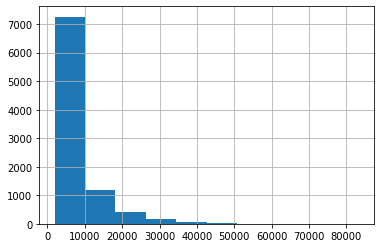

AxesSubplot(0.125,0.125;0.775x0.755)


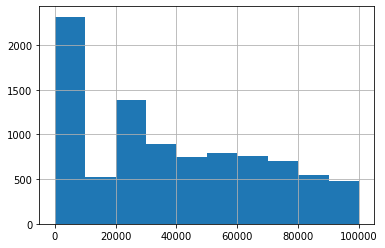

AxesSubplot(0.125,0.125;0.775x0.755)


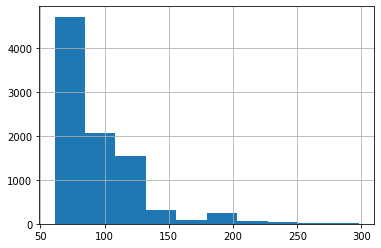

AxesSubplot(0.125,0.125;0.775x0.755)


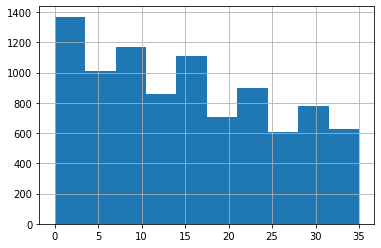

AxesSubplot(0.125,0.125;0.775x0.755)


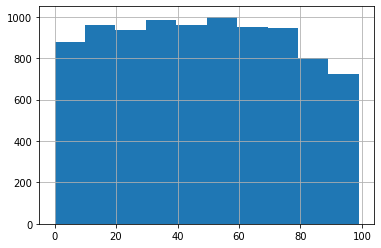

AxesSubplot(0.125,0.125;0.775x0.755)


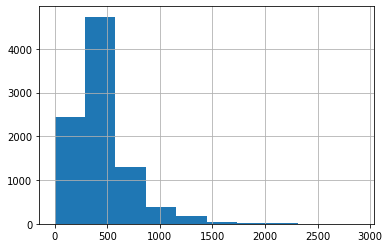

In [78]:
for x in numericals.columns:
    plt.show()
    print(numericals[x].hist());

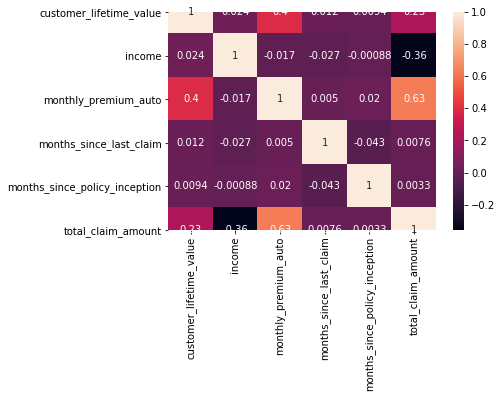

In [79]:
correlations_matrix = numericals.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [80]:
# Are these 3 variables more like discretes? Should i put them in bins? Would that actually help???

array([32, 13, 18, 12, 14,  0, 17, 23, 27,  9, 21, 11, 31,  8,  4, 30, 22,
       15, 33,  1, 19, 28, 10,  7,  3,  5, 20, 24, 29, 34,  6, 35,  2, 16,
       26, 25])

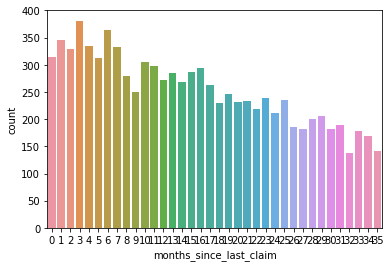

In [81]:
numericals['months_since_last_claim'].unique()
sns.countplot(x= 'months_since_last_claim', data= numericals)

[ 5 42 38 65 44 94 13 68  3  7 87 82 25 10 50 59  1 21 49 91 47 64 54  6
 14 56 17 40 62 86 79 15 32 28 16  4 57 77 95 26 53 12 98 36 71 60 20  0
 27 48 33 83 30 69 90 81 84 88 18 11 85 93 34 89  2 70 37 43  8 35 99 55
 75 51 92 29 63 61 46 41 31 45 67 22 23  9 72 96 58 66 73 39 19 97 52 76
 78 80 74 24] 100


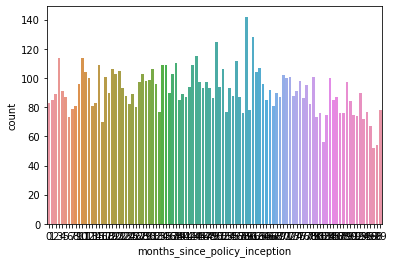

In [82]:
print(numericals['months_since_policy_inception'].unique(), len(numericals['months_since_policy_inception'].unique()))
sns.countplot(x= 'months_since_policy_inception', data= numericals)

[ 69  94 108 106  73  67 101  71  93 110  70  64  72  74  79  61 111 139
  80  63 237  65  62 117  91  90  66  99 103 172  92 104 113 124 105 100
 112  97  95 102 186  77  96  76 119  88 109 107 130  85  98 133  86  78
  83  68 192 118  89 140 127 168 126  82 115 217 114 138  81 255 150 123
 116 190 159  84 152 136 245 135 128 225 132 153 121 154 161 156 171  87
 244 183 176 230 129 177 196 131 276 253 137 180 203 147 165 198 125 193
 271 188 142 206 182 189 160 295 210 134 239 256 173 285 148 197 199 214
 175 167 194 164 181 222 215 283 169 248 223 273 151 213 145 185 287 297
 201 149 146 235 268 211 187 141 242 170 122 143 155 166 212 249 240 191
 195 216 144 179 232 158 207 184 238 229 220 178 204 281 234 218 275 209
 261 157 205 228 284 231 208 296 202 162 274 219 247 290 226 163 298 266
 254 252 174 286] 202


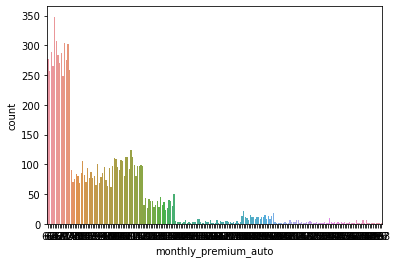

In [83]:
print(numericals['monthly_premium_auto'].unique(), len(numericals['monthly_premium_auto'].unique()))
sns.countplot(x= 'monthly_premium_auto', data= numericals)

In [84]:
crosstab6 = pd.crosstab(numericals['months_since_last_claim'], numericals['months_since_policy_inception'], margins = False)
Pval6= st.chi2_contingency(crosstab6)[1]
print('months_since_last_claim | months_since_policy_inception', Pval6)
#extremely dependant variables

crosstab7 = pd.crosstab(numericals['months_since_last_claim'], numericals['monthly_premium_auto'], margins = False)
Pval7= st.chi2_contingency(crosstab7)[1]
print('months_since_last_claim | monthly_premium_auto', Pval7)
#extremely dependant variables

crosstab8 = pd.crosstab(numericals['months_since_policy_inception'], numericals['monthly_premium_auto'], margins = False)
Pval8= st.chi2_contingency(crosstab8)[1]
print('months_since_policy_inception | monthly_premium_auto', Pval8)
#extremely dependant variables


# WTF IS GOING ON HERE ?? super dependant on each other ????

months_since_last_claim | months_since_policy_inception 7.391684282349309e-125
months_since_last_claim | monthly_premium_auto 8.281687464945712e-147
months_since_policy_inception | monthly_premium_auto 0.0


In [85]:
numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'total_claim_amount'],
      dtype='object')

---

### 1 ML try

- no modification or cleaning at all of the numericals variables
- not dropping either very dependant variables

In [86]:
categoricals_red.head(2)
categoricals_red.dtypes
categoricals_red.shape
numericals.head(2)
numericals.dtypes
categoricals_red.shape

,gender,coverage,employmentstatus,location_code,policy,renew_offer_type,vehicle_size
0,F,B,E,S,O,1,M
1,F,E,O,S,P,3,M


gender              object
coverage            object
employmentstatus    object
location_code       object
policy              object
renew_offer_type    object
vehicle_size        object
dtype: object

(9134, 7)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935


customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
total_claim_amount               float64
dtype: object

(9134, 7)

In [87]:
data= pd.concat([categoricals_red, numericals], axis= 1)

In [88]:
X_0 = data.drop(['total_claim_amount'],axis=1)
y_0 = data['total_claim_amount']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size=0.3, random_state=100)

In [90]:
numericals_train_0 = X_train.select_dtypes(np.number)
numericals_test_0 = X_test.select_dtypes(np.number)
numericals_train_0.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
8720,4564.512659,12626,69,31,15
6092,15519.671610,23402,82,3,28
1412,5049.689638,61080,66,7,41
4717,5129.608404,72433,126,34,48
3725,15481.252770,0,180,29,19


In [91]:
categoricals_train_0= X_train.select_dtypes(np.object)
categoricals_test_0= X_test.select_dtypes(np.object)
categoricals_train_0.head()

,gender,coverage,employmentstatus,location_code,policy,renew_offer_type,vehicle_size
8720,F,B,O,S,P,3,S
6092,M,E,O,S,P,3,M
1412,F,B,E,U,P,1,M
4717,M,E,E,U,P,2,L
3725,M,E,O,S,O,2,M


In [92]:
encoder_0 = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train_0)
categoricals_train_encoded_0 = encoder_0.transform(categoricals_train_0).toarray()
categoricals_test_encoded_0 = encoder_0.transform(categoricals_test_0).toarray()

In [93]:
X_train_0 = np.concatenate((numericals_train_0,categoricals_train_encoded_0),axis=1)
X_test_0 = np.concatenate((numericals_test_0,categoricals_test_encoded_0),axis=1)

In [94]:
X_train_0
X_test_0

array([[4.56451266e+03, 1.26260000e+04, 6.90000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.55196716e+04, 2.34020000e+04, 8.20000000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.04968964e+03, 6.10800000e+04, 6.60000000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [5.57766946e+03, 1.10970000e+04, 7.30000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.08270458e+03, 2.32060000e+04, 1.07000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.19802525e+03, 3.05980000e+04, 1.06000000e+02, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

array([[5.11257031e+03, 5.65870000e+04, 6.50000000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.88228671e+03, 2.12360000e+04, 1.23000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.48893103e+03, 3.38810000e+04, 6.80000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.47680656e+03, 5.52170000e+04, 1.07000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.75205015e+04, 4.83670000e+04, 1.61000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.86304871e+03, 4.10770000e+04, 7.10000000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [95]:
# trying with the KNN

KNN_0 = KNeighborsRegressor(n_neighbors=3)
KNN_0.fit(X_train_0, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [96]:
score_knn_0 = KNN_0.score(X_test_0, y_test)
score_knn_0

0.15994280539996966

In [97]:
LR_0 = linear_model.LinearRegression()
LR_0.fit(X_train_0,y_train_0)

NameError: name 'y_train_0' is not defined

In [ ]:
score_LR_0 = LR_0.score(X_test_0, y_test_0)
score_LR_0

In [ ]:
predictions = LR_0.predict(X_test_0)

In [ ]:
mse_0 = mean_squared_error(y_test_0, predictions)

In [ ]:
rmse = math.sqrt(mse_0)
print(rmse)

#### First try with no work on the num variables threw:

_score of_ : __76%__ </b>

_root mean squared error_ : __137__

---

### 2.1 ML try

- No pre-work on the numerical varibles
- Scaling numericals after split test (__standard scaler__)

In [131]:
numericals_train_1 = X_train.select_dtypes(np.number)
numericals_test_1 = X_test.select_dtypes(np.number)

In [132]:
# standard scaller takes every value divides it by mean and diveded the standard deviation
transformer_1 = StandardScaler().fit(numericals_train_1)
numericals_train_standardized_1 = transformer_1.transform(numericals_train_1)
numericals_test_standardized_1 = transformer_1.transform(numericals_test_1)

In [133]:
X_train_1 = np.concatenate((numericals_train_standardized_1,categoricals_train_encoded_0),axis=1)
X_test_1 = np.concatenate((numericals_test_standardized_1,categoricals_test_encoded_0),axis=1)

In [134]:
KNN_1 = KNeighborsRegressor(n_neighbors=3)
KNN_1.fit(X_train_1, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [135]:
score_knn_1 = KNN_1.score(X_test_1, y_test)
score_knn_1

0.6756304643653692

In [136]:
LR_1 = linear_model.LinearRegression()
LR_1.fit(X_train_1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
score_LR_1 = LR_1.score(X_test_1, y_test)
score_LR_1

0.7621401557954863

In [138]:
predictions_1 = LR_1.predict(X_test_1)
mse_1 = mean_squared_error(y_test, predictions_1)
rmse_1 = math.sqrt(mse_1)

In [139]:
print(rmse_1)

137.8016917996299


#### Second try with standard scaler after the split:

_score of_ : __76%__ </b>

_root mean squared error_ : __137__


#### We can say that <font color=blue> standard scaler </font> does not impact at all on the final score if there's no pre-work of the variables

---

### 2.2 ML try

- No pre-work on the numerical varibles
- Scaling numericals after split test (__minmax scaler__)

In [140]:
numericals_train_2 = X_train.select_dtypes(np.number)
numericals_test_2 = X_test.select_dtypes(np.number)

In [141]:
# standard scaller takes every value divides it by mean and diveded the standard deviation
MinMaxtransformer_2 = MinMaxScaler().fit(numericals_train_2)
numericals_train_normalized_2 = MinMaxtransformer_2.transform(numericals_train_2)
numericals_test_normalized_2 = MinMaxtransformer_2.transform(numericals_test_2)

In [142]:
X_train_2 = np.concatenate((numericals_train_normalized_2,categoricals_train_encoded_0),axis=1)
X_test_2= np.concatenate((numericals_test_normalized_2,categoricals_test_encoded_0),axis=1)

In [143]:
KNN_2 = KNeighborsRegressor(n_neighbors=3)
KNN_2.fit(X_train_2, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [144]:
score_knn_2 = KNN_1.score(X_test_2, y_test)
score_knn_2

0.41446068257437696

In [145]:
LR_2 = linear_model.LinearRegression()
LR_2.fit(X_train_2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
score_LR_2 = LR_2.score(X_test_2, y_test)
score_LR_2

0.7621401557954861

In [147]:
predictions_2 = LR_2.predict(X_test_2)
mse_2 = mean_squared_error(y_test, predictions_2)
rmse_2= math.sqrt(mse_2)

In [148]:
print(rmse_2)

137.80169179962996


#### Second try with minmax scaler after the split:

_score of_ : __76%__ </b>

_root mean squared error_ : __137__


#### We can say that <font color=blue> minmax scaler </font> does not impact at all on the final score if there's no pre-work of the variables. 

_There's only one major difference when running the KNN where the result was way higher than the one obtained with  <font color=blue> standard scaler </font>_

---

### 3 ML try

- Lets try dropping some of the very dependant numerical variables
- Scaling numericals after split test (__minmax scaler__)

In [119]:
X_1 = data.drop(columns= ['total_claim_amount', 'months_since_last_claim', 'months_since_policy_inception'])
y_1 = data['total_claim_amount']

In [120]:
X_train_3, X_test_3, y_train, y_test = train_test_split(X_1, y_1, test_size=0.3, random_state=100)

In [121]:
numericals_train_3 = X_train_3.select_dtypes(np.number)
numericals_test_3 = X_test_3.select_dtypes(np.number)
numericals_train_3.head()

,customer_lifetime_value,income,monthly_premium_auto
8720,4564.512659,12626,69
6092,15519.671610,23402,82
1412,5049.689638,61080,66
4717,5129.608404,72433,126
3725,15481.252770,0,180


In [122]:
MinMaxtransformer_3 = MinMaxScaler().fit(numericals_train_3)
numericals_train_normalized_3 = MinMaxtransformer_3.transform(numericals_train_3)
numericals_test_normalized_3 = MinMaxtransformer_3.transform(numericals_test_3)

In [123]:
categoricals_train_0= X_train.select_dtypes(np.object)
categoricals_test_0= X_test.select_dtypes(np.object)
categoricals_train_0.head()

,gender,coverage,employmentstatus,location_code,policy,renew_offer_type,vehicle_size
8720,F,B,O,S,P,3,S
6092,M,E,O,S,P,3,M
1412,F,B,E,U,P,1,M
4717,M,E,E,U,P,2,L
3725,M,E,O,S,O,2,M


In [124]:
encoder_0 = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train_0)
categoricals_train_encoded_0 = encoder_0.transform(categoricals_train_0).toarray()
categoricals_test_encoded_0 = encoder_0.transform(categoricals_test_0).toarray()

In [125]:
X_train_3 = np.concatenate((numericals_train_normalized_3,categoricals_train_encoded_0),axis=1)
X_test_3 = np.concatenate((numericals_test_normalized_3,categoricals_test_encoded_0),axis=1)

In [126]:
# trying with the KNN

KNN_3 = KNeighborsRegressor(n_neighbors=3)
KNN_3.fit(X_train_3, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [127]:
score_knn_3 = KNN_3.score(X_test_3, y_test)
score_knn_3

0.6572089206952688

In [128]:
LR_3 = linear_model.LinearRegression()
LR_3.fit(X_train_3,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
score_LR_3 = LR_3.score(X_test_3, y_test)
score_LR_3

0.7622150344691583

In [150]:
predictions = LR_3.predict(X_test_3)

In [151]:
mse_3 = mean_squared_error(y_test, predictions)

In [152]:
rmse_3 = math.sqrt(mse_3)
print(rmse_3)

137.7799999917145


#### Second try with minmax scaler after the split:

_score of_ : __76%__ </b>

_root mean squared error_ : __137__


#### Dropping 2 very dependant numerical variables incresed our models efficiency a lil bit.

---

### Let's take a step back and improve our numerical variables

- Let's try normalizing the data before the split

In [191]:
numericals_red= numericals[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']]

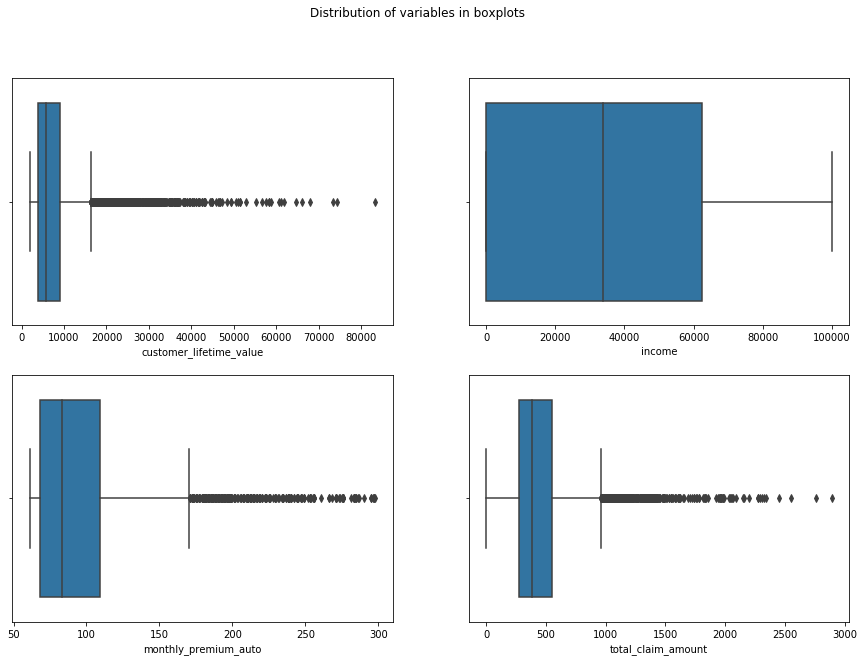

In [192]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

fig.suptitle('Distribution of variables in boxplots')

sns.boxplot(ax=axes[0, 0],data= numericals_red, x= 'customer_lifetime_value')
sns.boxplot(ax=axes[0, 1],data= numericals_red, x= 'income' )
sns.boxplot(ax=axes[1, 0],data= numericals_red, x= 'monthly_premium_auto' )
sns.boxplot(ax=axes[1, 1],data= numericals_red, x= 'total_claim_amount');

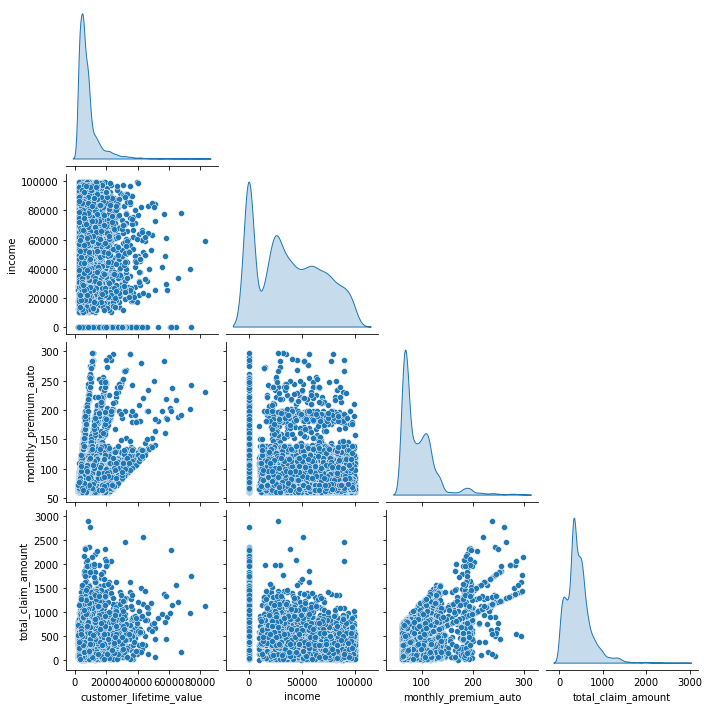

In [193]:
sns.pairplot(numericals_red, diag_kind= 'kde', corner= True);

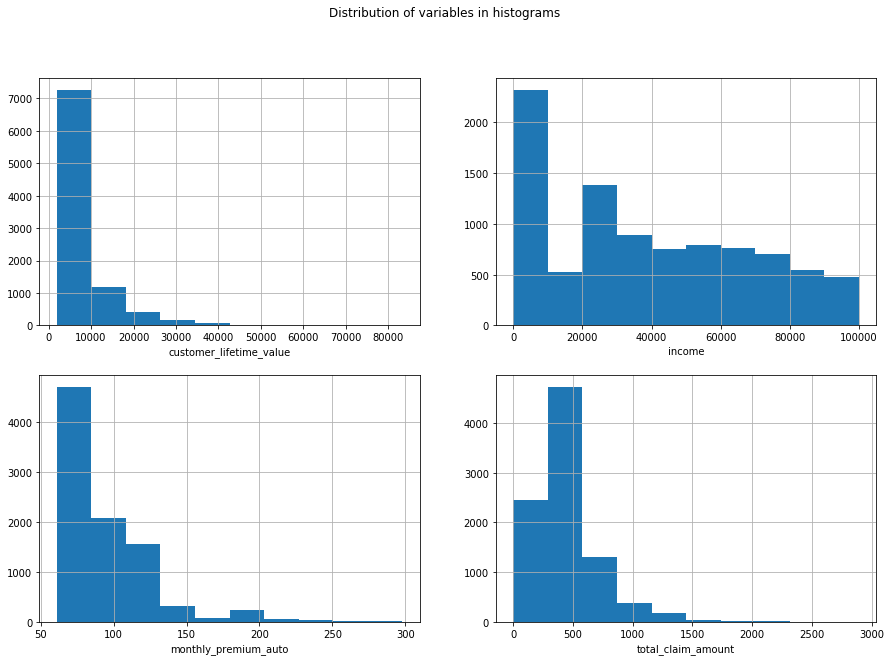

In [194]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

fig.suptitle('Distribution of variables in histograms')

axes[0,0].set_xlabel('customer_lifetime_value')
axes[0,1].set_xlabel('income')
axes[1,0].set_xlabel('monthly_premium_auto')
axes[1,1].set_xlabel('total_claim_amount')

numericals_red['customer_lifetime_value'].hist(ax=axes[0, 0])
numericals_red['income'].hist(ax=axes[0, 1])
numericals_red['monthly_premium_auto'].hist(ax=axes[1, 0])
numericals_red['total_claim_amount'].hist(ax=axes[1, 1]);

In [195]:
# there's some skewness lets try applyin a log

def log_transfom_clean(x):
    if np.isfinite(x):
        return np.log(x)
    else:
        return 0

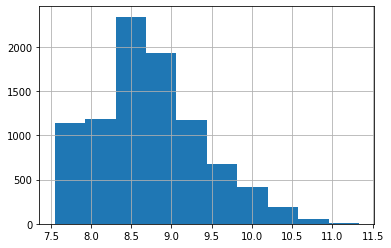

In [196]:
numericals_red['customer_lifetime_value'] = numericals_red['customer_lifetime_value'].apply(log_transfom_clean)
numericals_red['customer_lifetime_value'].hist()

# looks more like normalized data
# should i also drop outliers???

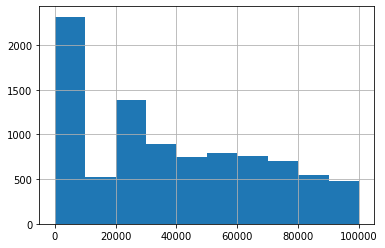

In [198]:
#numericals_red['income'] = numericals_red['income'].apply(log_transfom_clean)
numericals_red['income'].hist()

# this is a weird one...

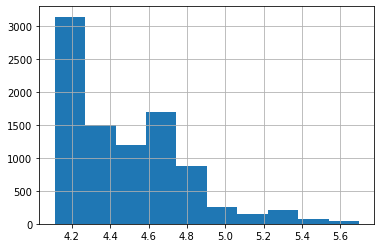

In [197]:
numericals_red['monthly_premium_auto'] = numericals_red['monthly_premium_auto'].apply(log_transfom_clean)
numericals_red['monthly_premium_auto'].hist()

---

### 4 ML try

- Let's see what happens with scales nums after and before

In [200]:
data_2= pd.concat([categoricals_red, numericals_red], axis= 1)

In [203]:
X_2 = data_2.drop(columns= ['total_claim_amount'])
y_2 = data_2['total_claim_amount']

In [204]:
X_train_4, X_test_4, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3, random_state=100)

In [205]:
numericals_train_4 = X_train_4.select_dtypes(np.number)
numericals_test_4 = X_test_4.select_dtypes(np.number)
numericals_train_4.head()

,customer_lifetime_value,income,monthly_premium_auto
8720,8.426067,12626,4.234107
6092,9.649864,23402,4.406719
1412,8.527082,61080,4.189655
4717,8.542785,72433,4.836282
3725,9.647385,0,5.192957


In [206]:
MinMaxtransformer_4 = MinMaxScaler().fit(numericals_train_4)
numericals_train_normalized_4 = MinMaxtransformer_4.transform(numericals_train_4)
numericals_test_normalized_4 = MinMaxtransformer_4.transform(numericals_test_4)

In [207]:
X_train_4 = np.concatenate((numericals_train_normalized_4,categoricals_train_encoded_0),axis=1)
X_test_4 = np.concatenate((numericals_test_normalized_4,categoricals_test_encoded_0),axis=1)

In [208]:
# trying with the KNN

KNN_4 = KNeighborsRegressor(n_neighbors=3)
KNN_4.fit(X_train_4, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [209]:
score_knn_4 = KNN_3.score(X_test_4, y_test)
score_knn_4

0.41076254612765906

In [210]:
LR_4 = linear_model.LinearRegression()
LR_4.fit(X_train_4,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [211]:
score_LR_4 = LR_4.score(X_test_4, y_test)
score_LR_4

0.7431956322989981

In [213]:
predictions = LR_4.predict(X_test_4)

In [214]:
mse_4 = mean_squared_error(y_test, predictions)

In [215]:
rmse_4 = math.sqrt(mse_4)
print(rmse_4)

143.1842296738095
